# CAB420, Week 3 Practical - Question 1 Solution

## Binary Classification

Consider the data set redwine-binary.csv. This data contains both objective measurements on chemical and physical properties of the red wines, and subjective measurements of quality based on expert judegments. In this data, wine quality is the response variable and is either "above average" (1) or "below average" (0) Using this data set:

1. Fit a Support Vector Machine to the data, and select appropriate values of C and an appropriate kernel to maximise accuracy. 

2. Fit a K-Nearest Neighbours Classifier to the data, and select appropriate values of K and the distance metric to maximise accuracy.

For both models, repeat your experiments with and without standardising the data, and note any differences in performance. 

In [1]:
# import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm

In [2]:
# reading in the binary data set
redwine_binary = pd.read_csv('../../data/redwine/redwine-binary.csv')
# seperating into our covariates/feratures and our response variable
# can get the response variable by just dropping the `quality` column (which is our response variable)
X = redwine_binary.drop('quality', axis=1)
# now get the response variable by just getting the `quality` column
Y = redwine_binary['quality']
# lets separate it into train and test splits as well
# will use 80% for train, 20% for test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Before we go too far, we need to check our data and see if we have any scale issues

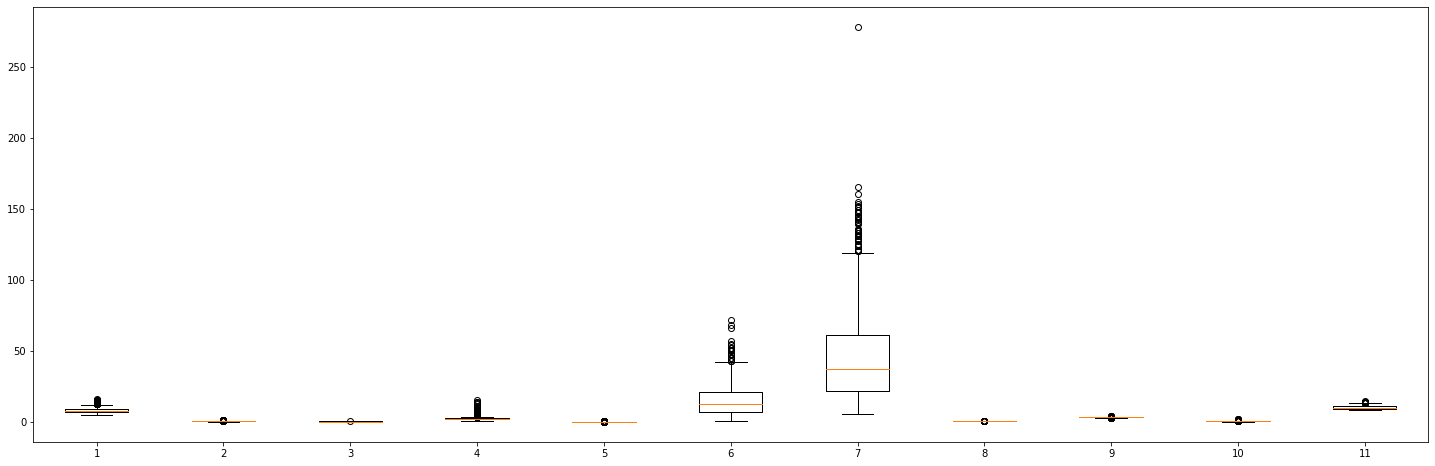

In [3]:
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);

We have one dimension in particular that has a much larger range to others, so we'll standardise the data.

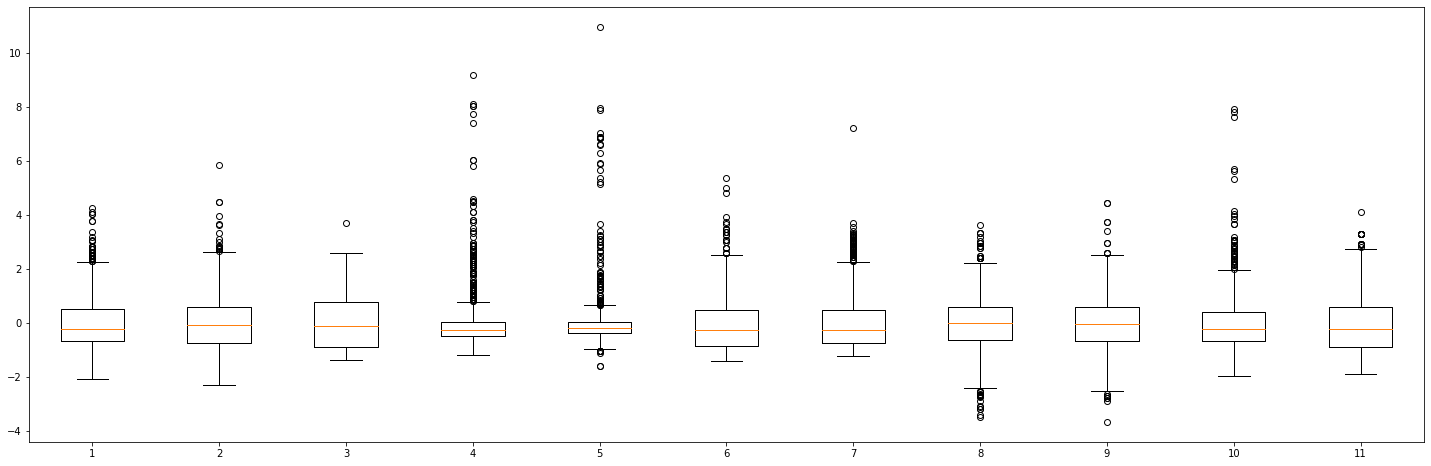

In [4]:
mu = np.mean(X_train)
sigma = np.std(X_train)
X_train = (X_train - mu) / sigma;
X_test = (X_test - mu) / sigma;
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);

In [5]:
# helper function adapted from lecture examples

# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - get precision, recall, f1 for test data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

## SVMs
Let's try an SVM. We'll start with the default settings.

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       154
           1       0.76      0.73      0.75       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



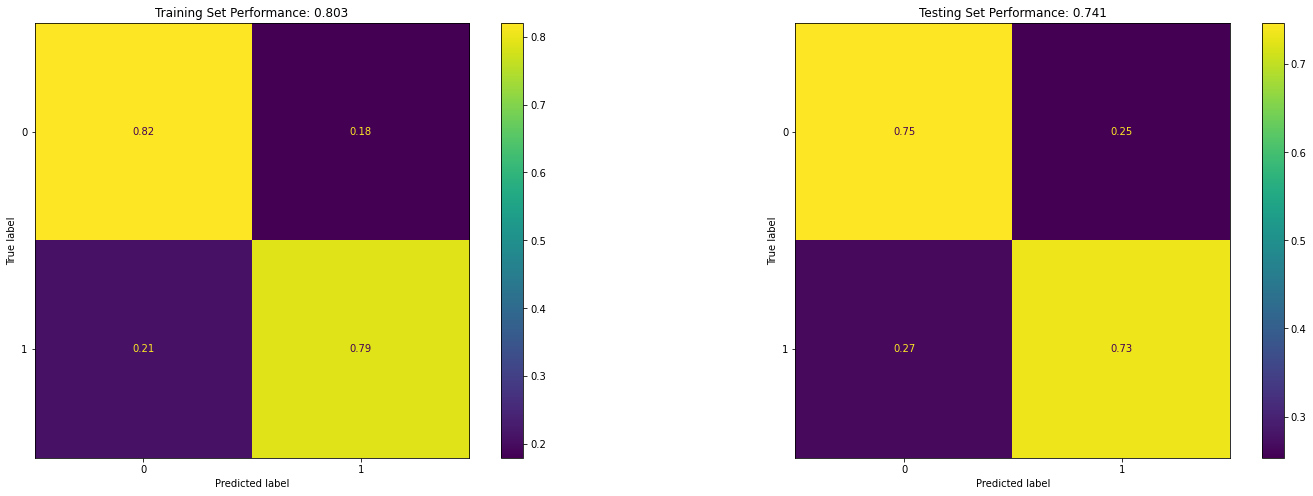

In [6]:
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Changing C
We'll try 5 values:
Hard-margin SVM (i.e. C = inf)
C=1000
C=10
C=0.1
C=0.001

#### Note:
Running this next bit of code is going to take a while. Good opporunity to go get a coffee.

We also see that we get some errors about convergence, i.e. our data may not actually be separable with some of those values of C.

Linear SVM, with C = inf


/home/simondenman/venv/CAB420/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.34      0.34       154
           1       0.40      0.41      0.40       166

    accuracy                           0.38       320
   macro avg       0.37      0.37      0.37       320
weighted avg       0.37      0.38      0.37       320

Linear SVM, with C = 1000


/home/simondenman/venv/CAB420/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.73      0.75      0.74       154
           1       0.76      0.74      0.75       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Linear SVM, with C = 10
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       154
           1       0.76      0.73      0.74       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Linear SVM, with C = 0.1
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       154
           1       0.77      0.71      0.74       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74  

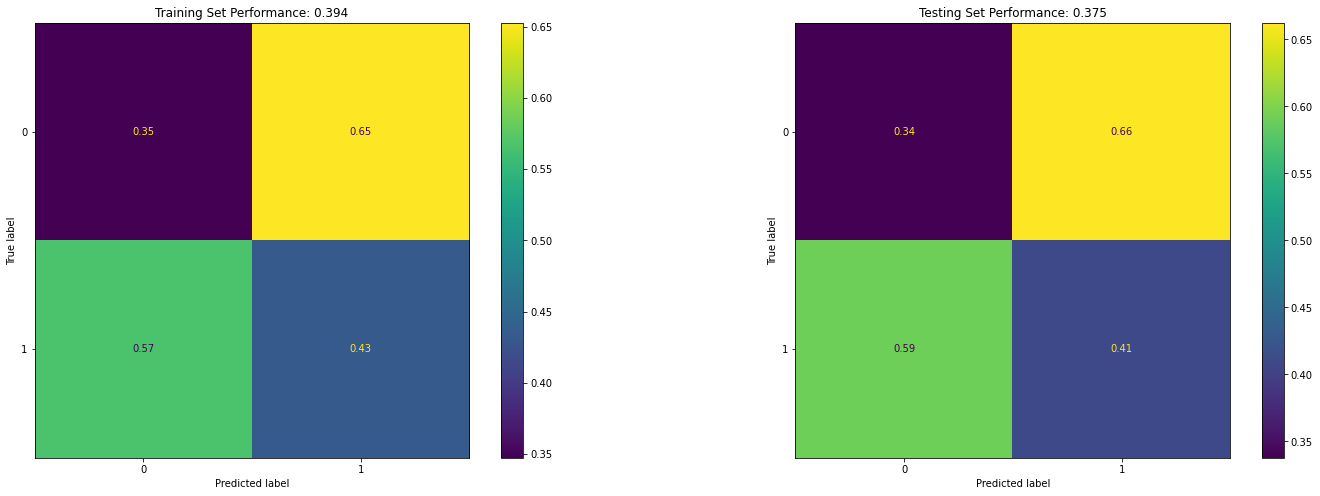

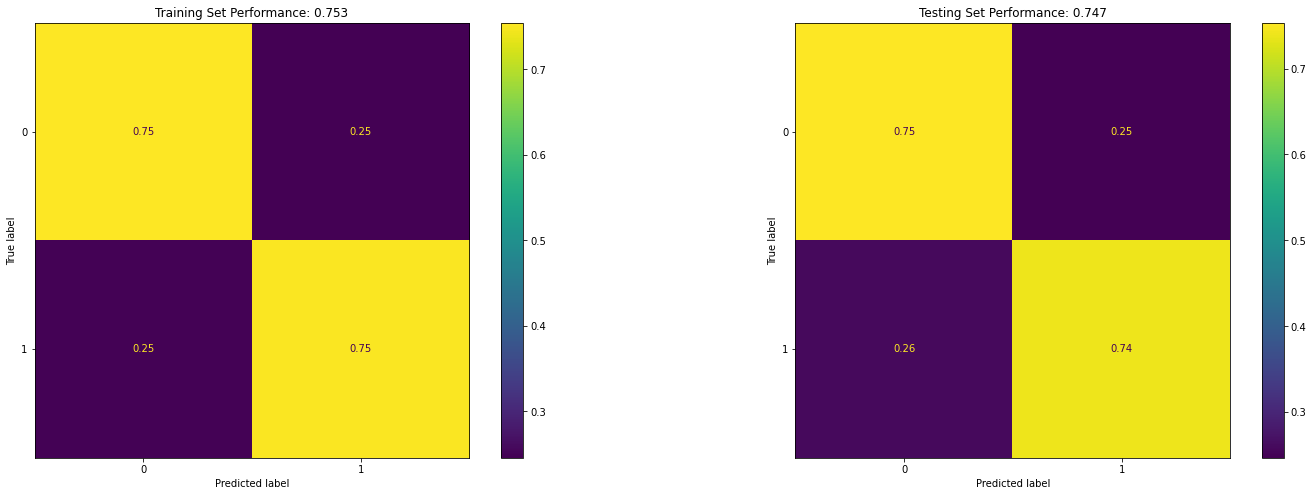

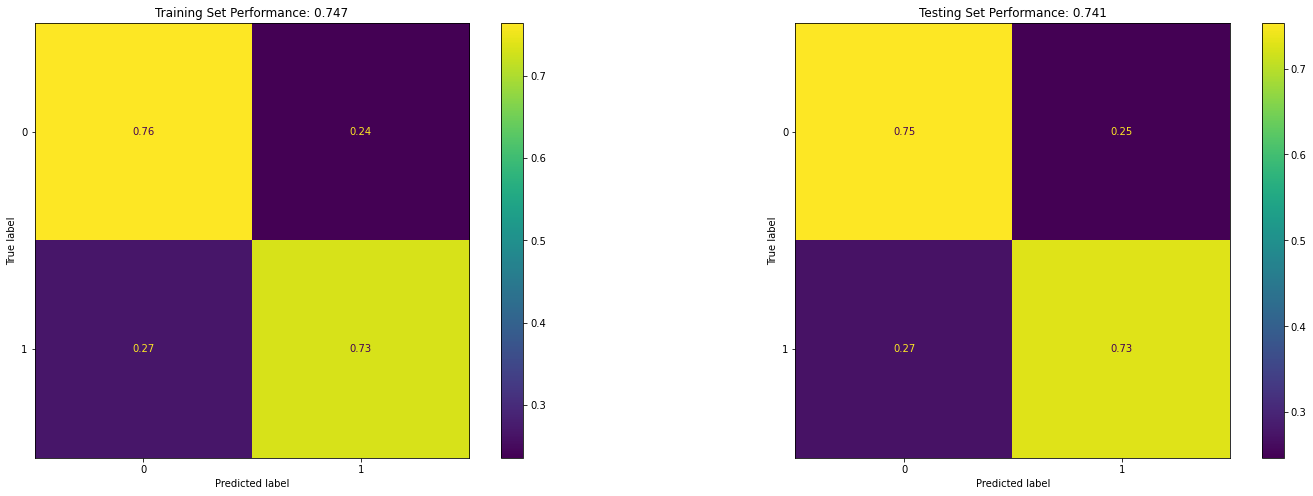

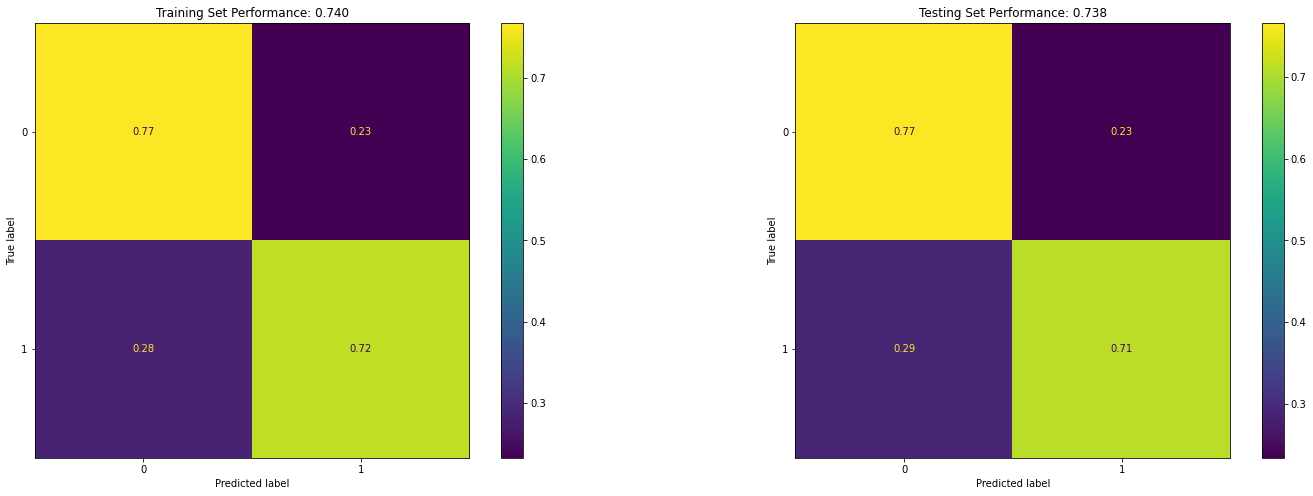

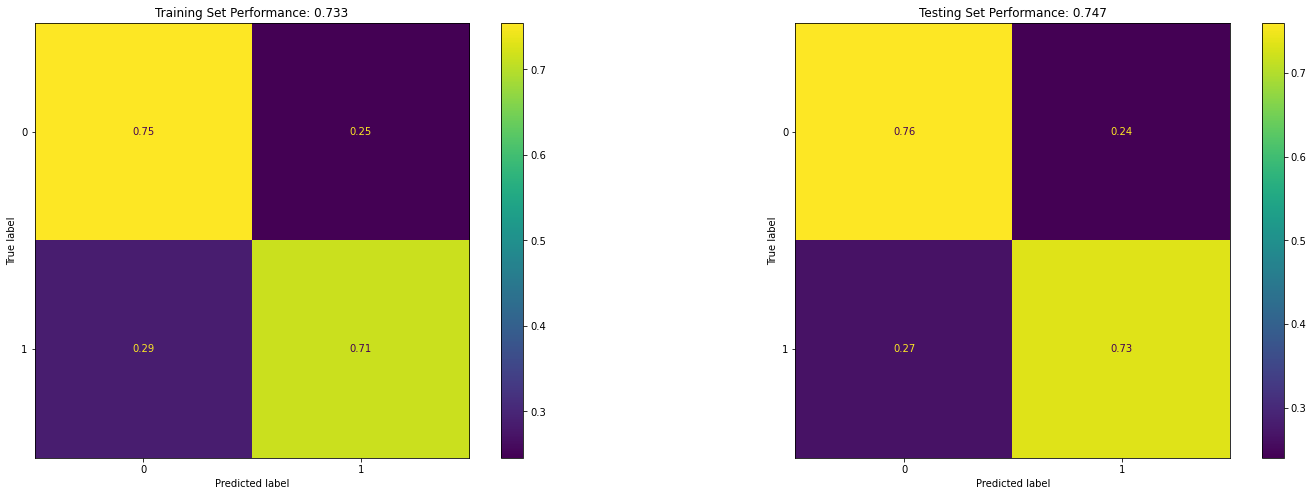

In [7]:
for C in [np.inf, 1000, 10, 0.1, 0.001]:
  print('Linear SVM, with C = {}'.format(C))
  svm = SVC(C=C, kernel='linear', max_iter=10e5)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_test, Y_test)

These models fail to converge, the data is not linearly separable, and so we need to relax the constraints somewhat.
Out middle three (10, 1, 0.1) values of C all obtain very similar performance

## Non Linear Kernels

We'll start by working with RBF (also called the squared exponential, or Gaussian Kernel).
We need to set the scale parameter. By default, SVC from SKLearn will set the scale to  `1 / (n_features * X.var())`.
To use this default, we set the `gamma` argument within the RBF kernel to be the string `'scale'`.
Otherwise we can set `gamma` to whatever we want to control the scale.

We'll try a few options.

RBF SVM, with scale = 10
              precision    recall  f1-score   support

           0       0.98      0.27      0.43       154
           1       0.60      0.99      0.74       166

    accuracy                           0.65       320
   macro avg       0.79      0.63      0.59       320
weighted avg       0.78      0.65      0.59       320

RBF SVM, with scale = 100
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       154
           1       0.58      1.00      0.73       166

    accuracy                           0.62       320
   macro avg       0.79      0.61      0.55       320
weighted avg       0.78      0.62      0.56       320

RBF SVM, with scale = 0.1
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       154
           1       0.76      0.73      0.75       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       3

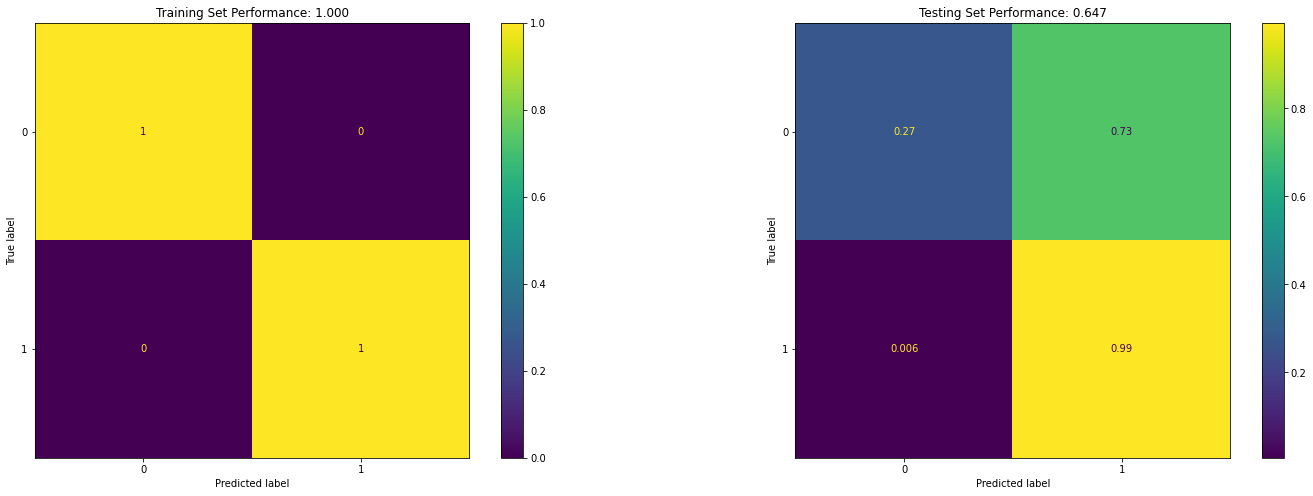

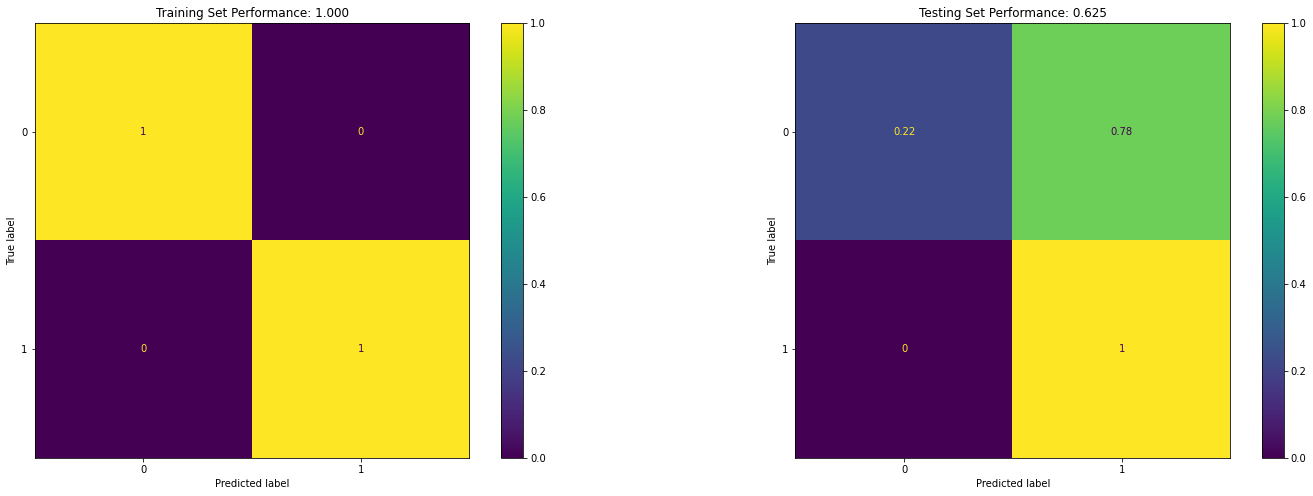

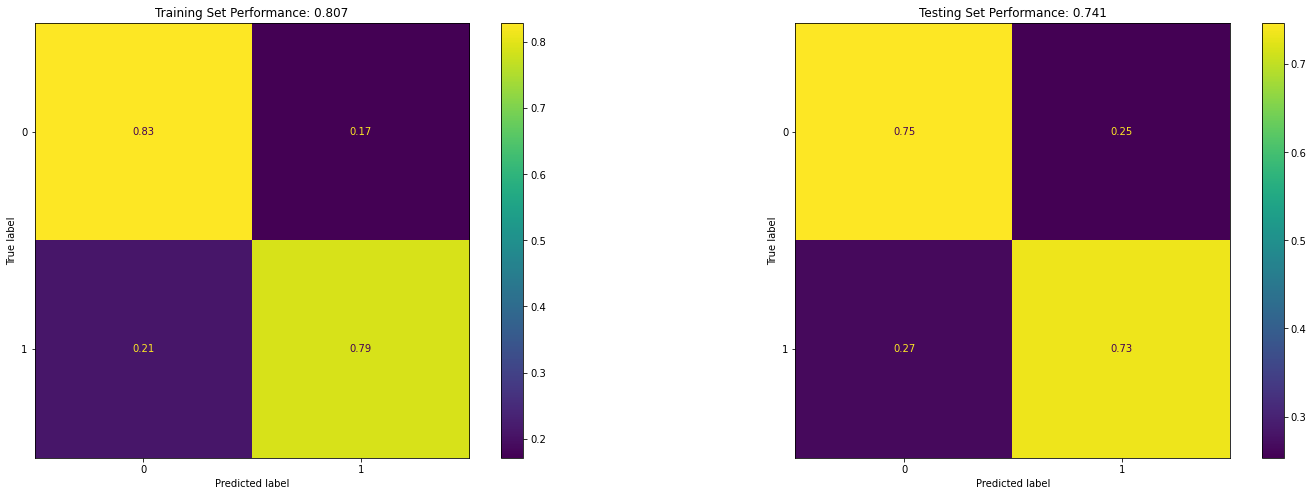

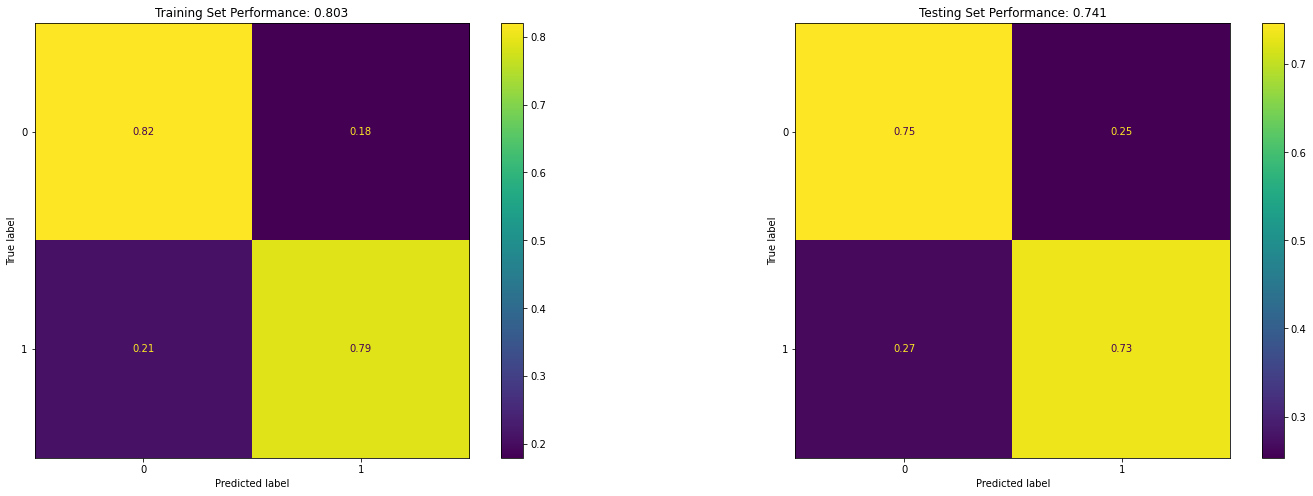

In [8]:
for kernel_scale in [10, 100, 0.1, 'scale']:
  print('RBF SVM, with scale = {}'.format(kernel_scale))
  svm = SVC(kernel='rbf', gamma=kernel_scale, max_iter=10e6)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_test, Y_test)

Trying Polynomial kernel now. Again, we'll try a bunch of different polynomial degrees. We can thing of higher degrees as just being more complex (i.e. more dimensions).

Polynomial Kernel SVM, with degree = 2
              precision    recall  f1-score   support

           0       0.63      0.48      0.55       154
           1       0.61      0.74      0.67       166

    accuracy                           0.62       320
   macro avg       0.62      0.61      0.61       320
weighted avg       0.62      0.62      0.61       320

Polynomial Kernel SVM, with degree = 3
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       154
           1       0.75      0.75      0.75       166

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Polynomial Kernel SVM, with degree = 5
              precision    recall  f1-score   support

           0       0.82      0.49      0.62       154
           1       0.66      0.90      0.76       166

    accuracy                           0.70       320
   macro av

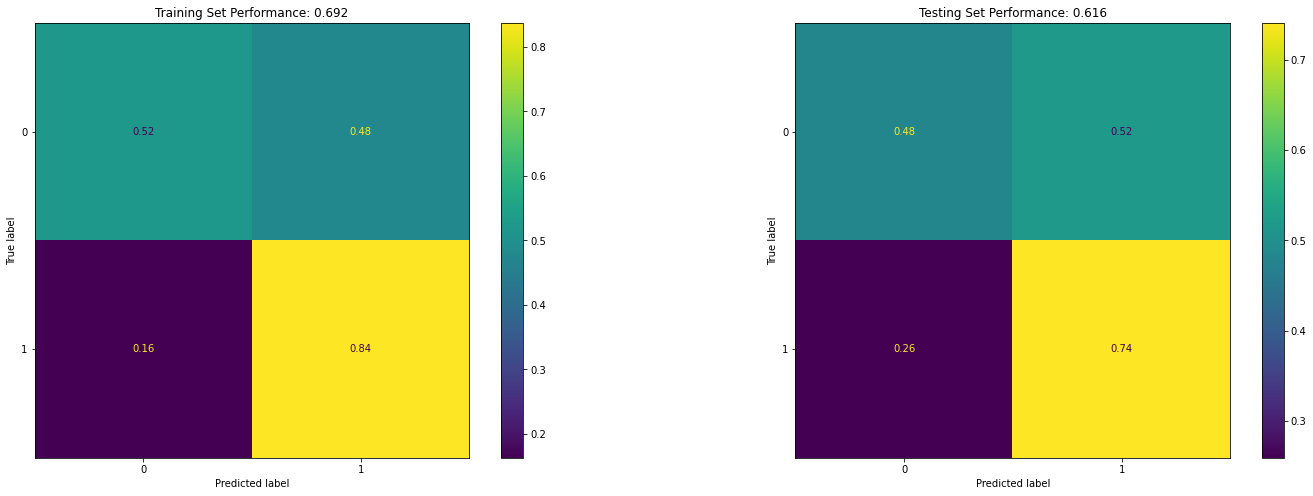

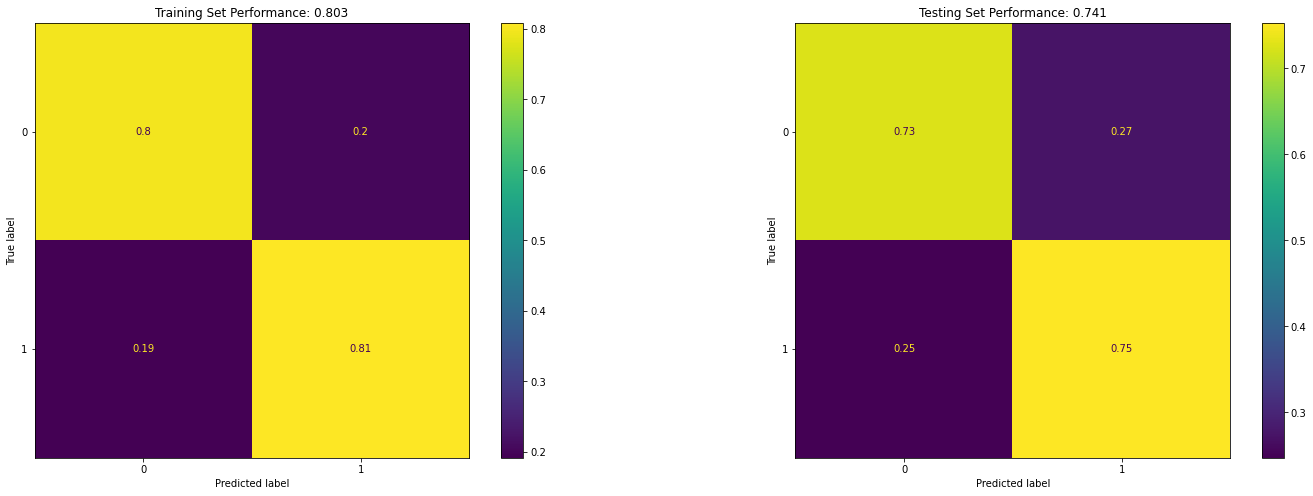

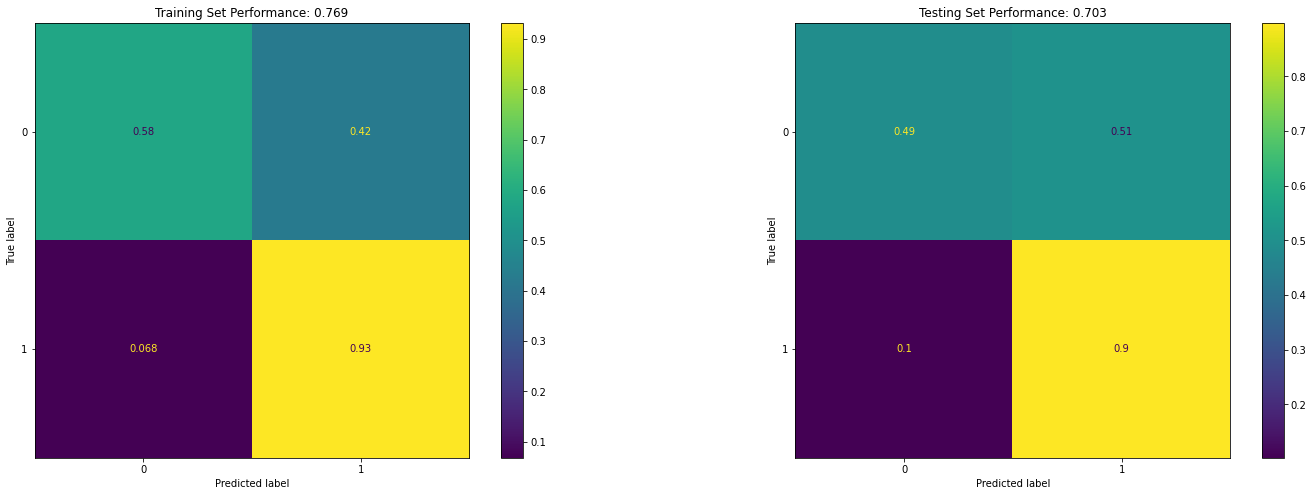

In [9]:
for degree in [2, 3, 5]:
  print('Polynomial Kernel SVM, with degree = {}'.format(degree))
  svm = SVC(kernel='poly', degree=degree, max_iter=10e6)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_test, Y_test)

We can see these aren't as good as our RBF kernels. Keep in mind though that we haven't considered different values of C here (or with the RBF kernels either), so there may exist a better solution that we haven't found. We could quite easily use a nested loop to search through multiple kernel parameters and values of C, and this would actually give us a grid search. This would be something worth exploring in your own time.

## CKNN

We'll now try a CKNN.

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       154
           1       0.73      0.75      0.74       166

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



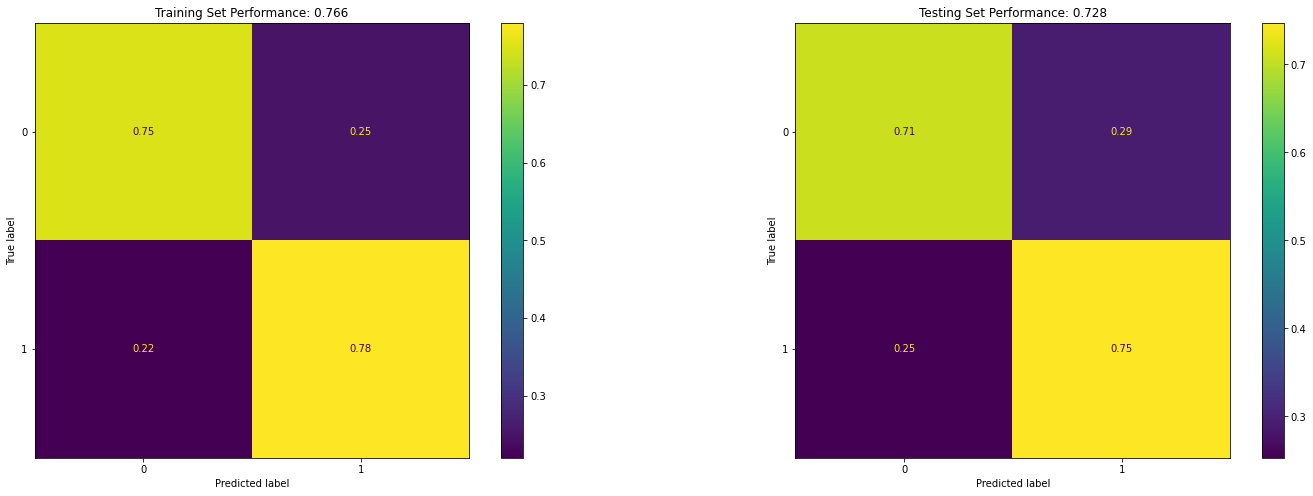

In [10]:
cknn = KNeighborsClassifier(n_neighbors=20)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

Performance here isn't bad, and is close to what we had with the SVM. Let's try different values of K and see if we can improve on it

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       154
           1       0.78      0.73      0.75       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

           0       0.65      0.85      0.73       154
           1       0.80      0.57      0.66       166

    accuracy                           0.70       320
   macro avg       0.72      0.71      0.70       320
weighted avg       0.73      0.70      0.70       320

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       154
           1       0.78      0.66      0.72       166

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320

              preci

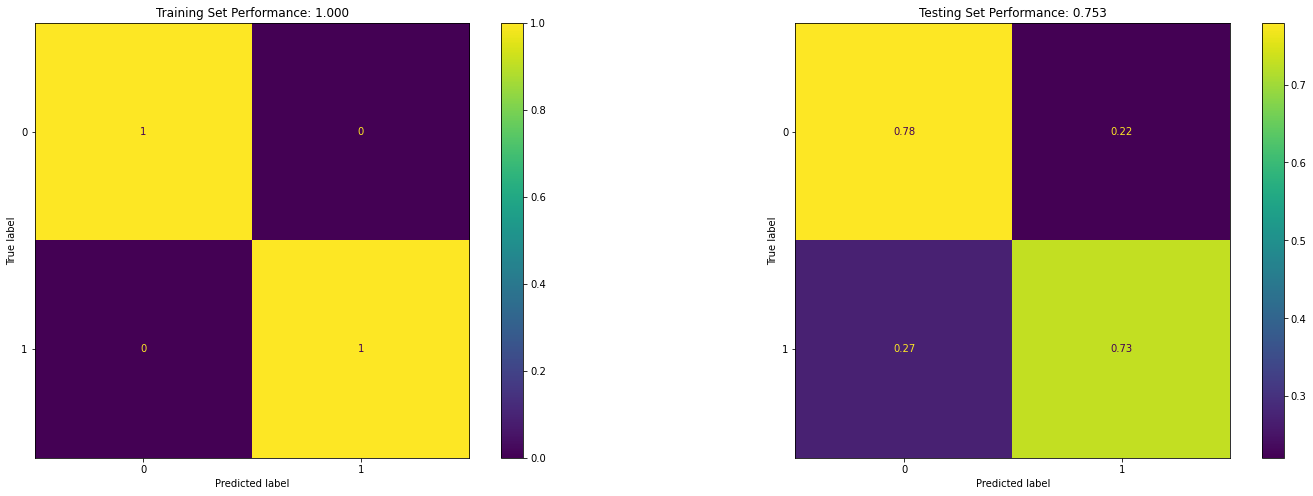

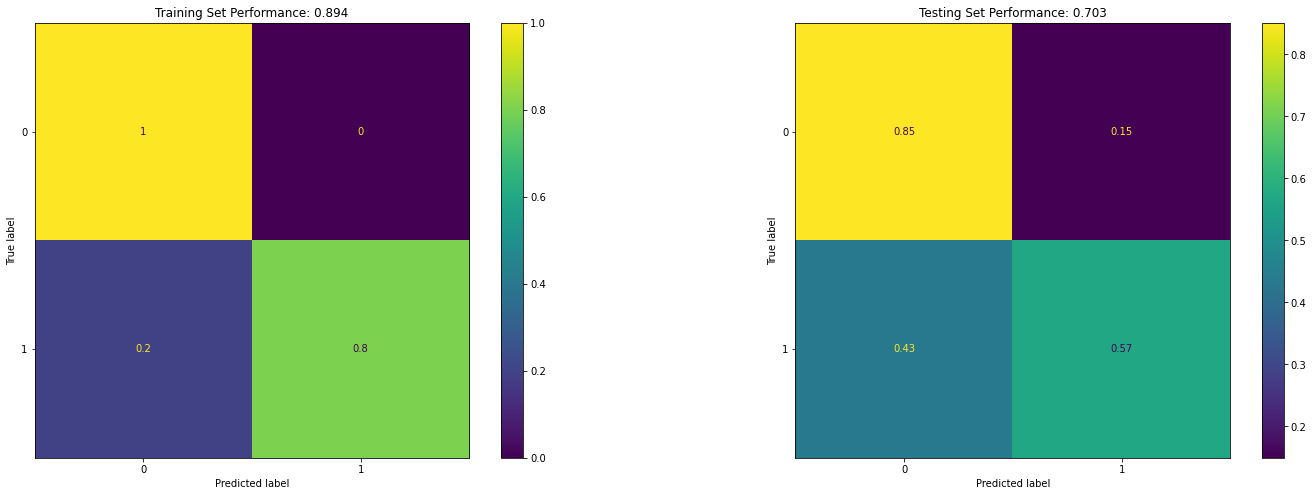

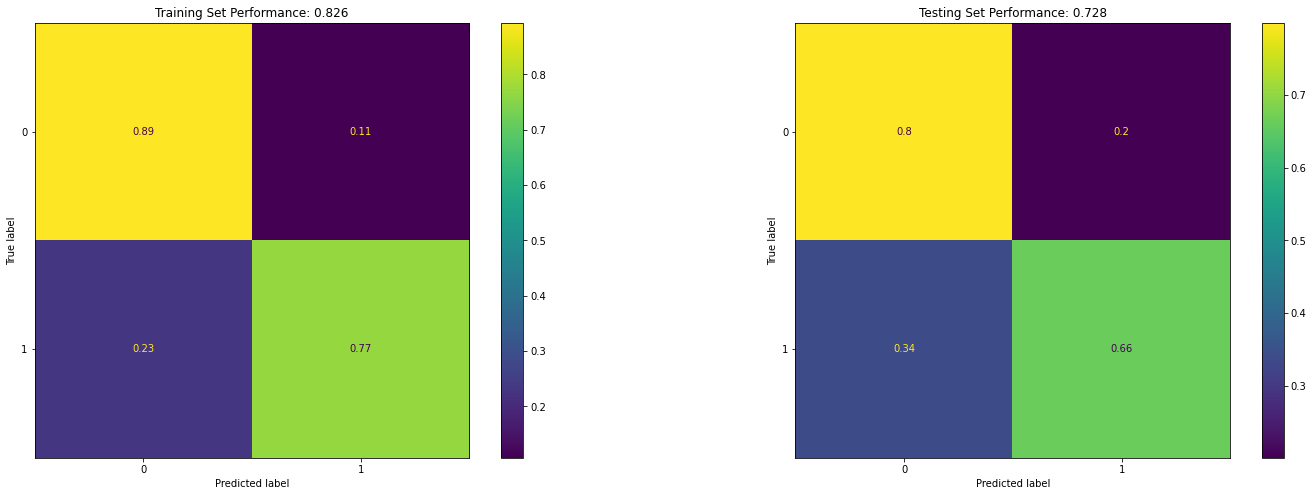

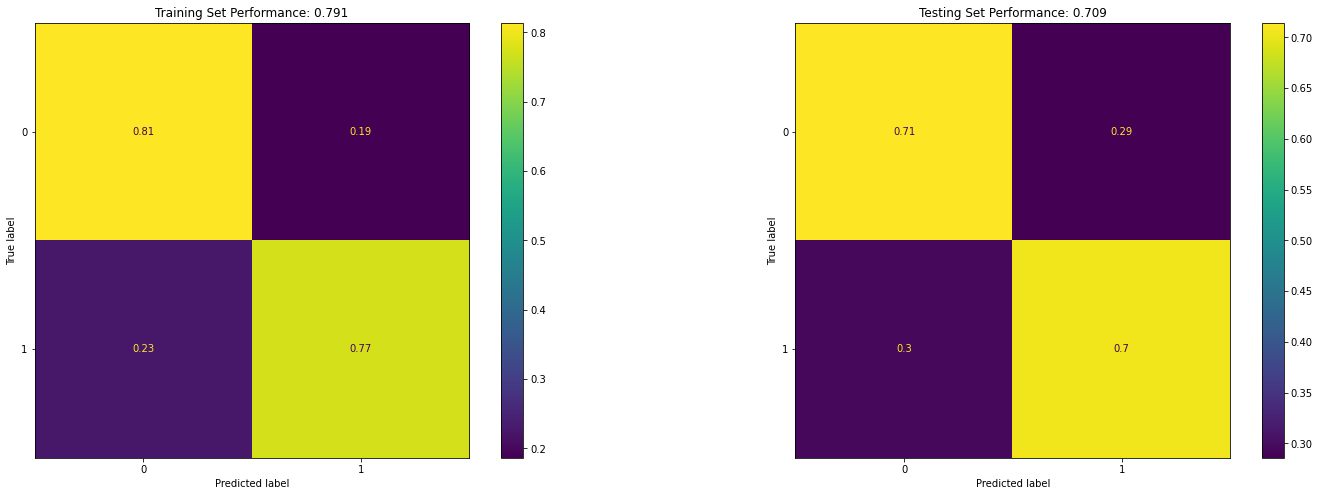

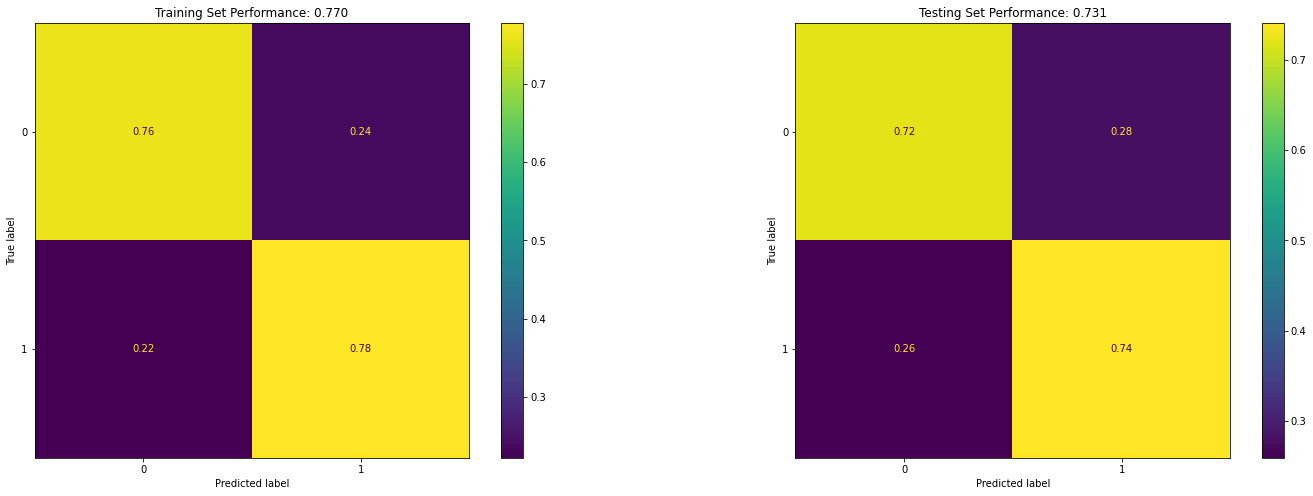

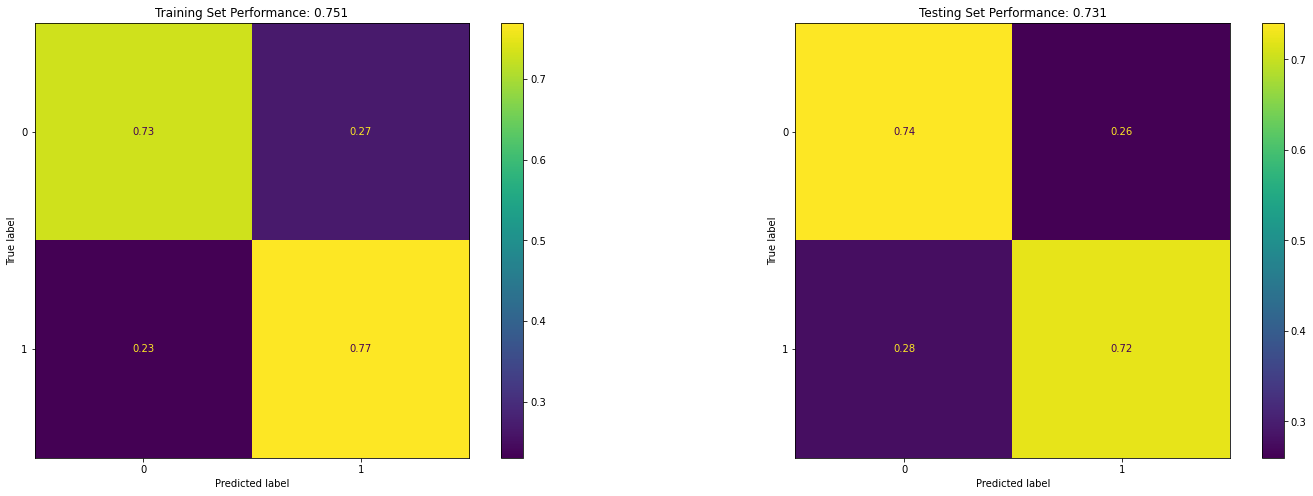

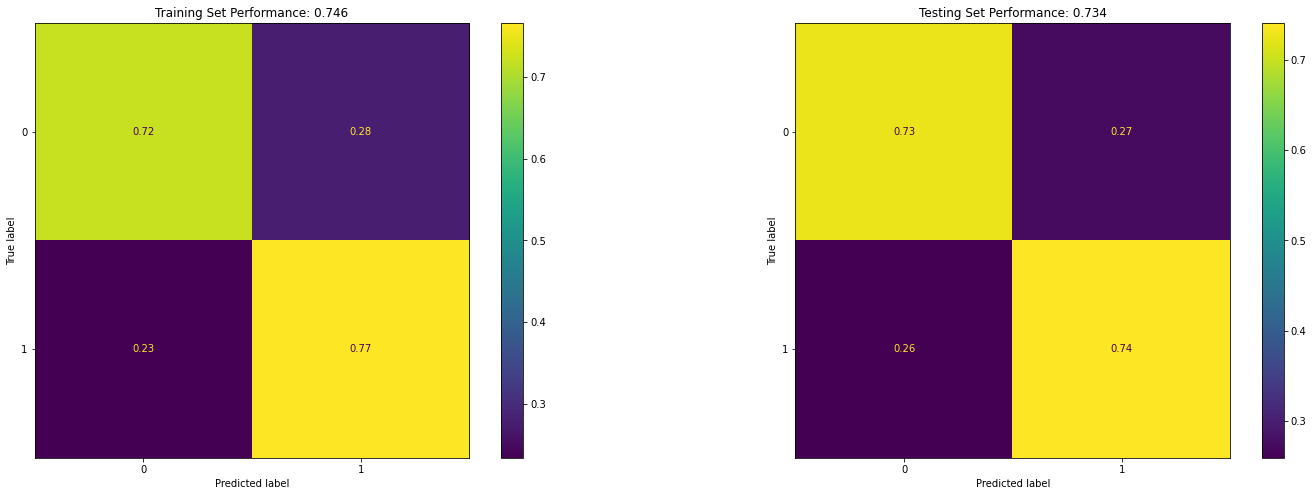

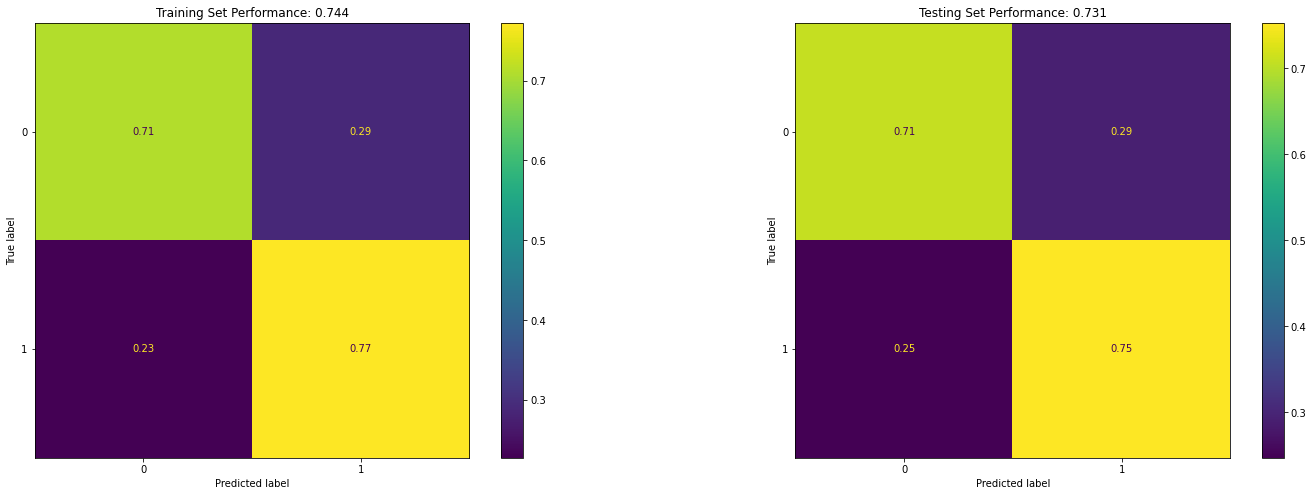

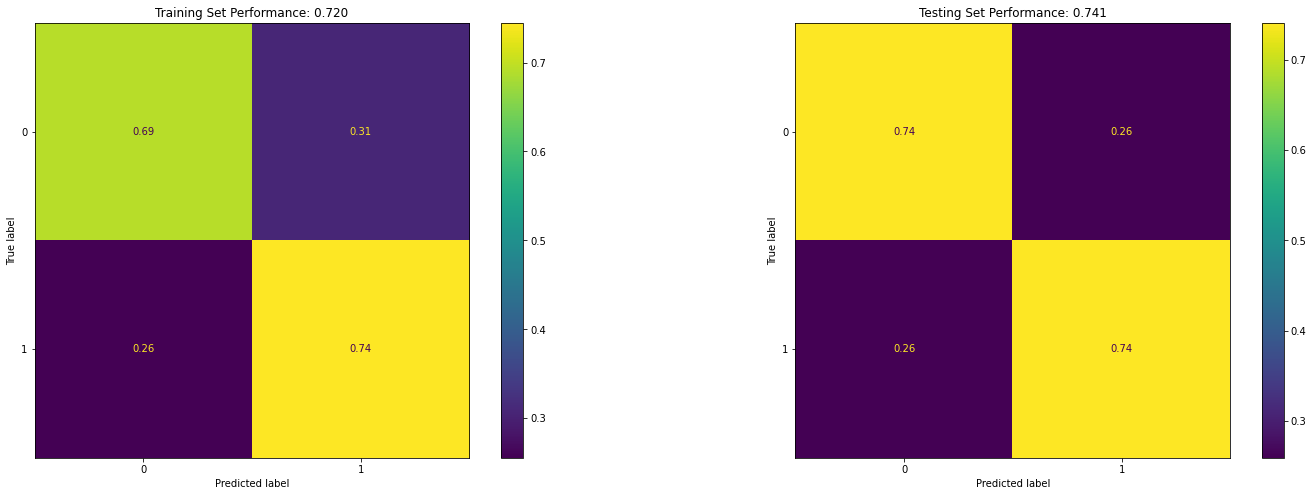

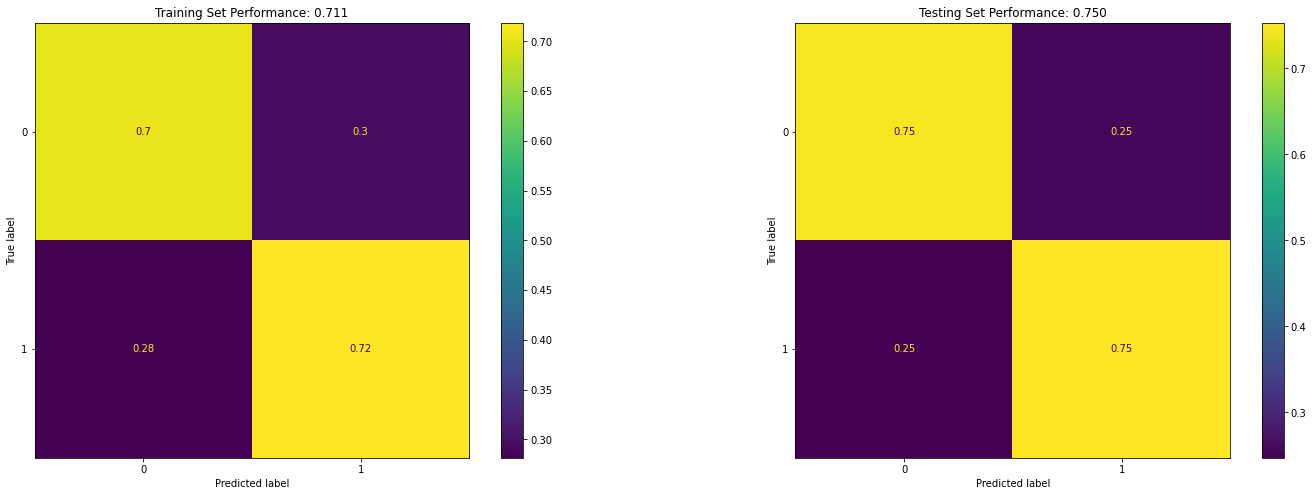

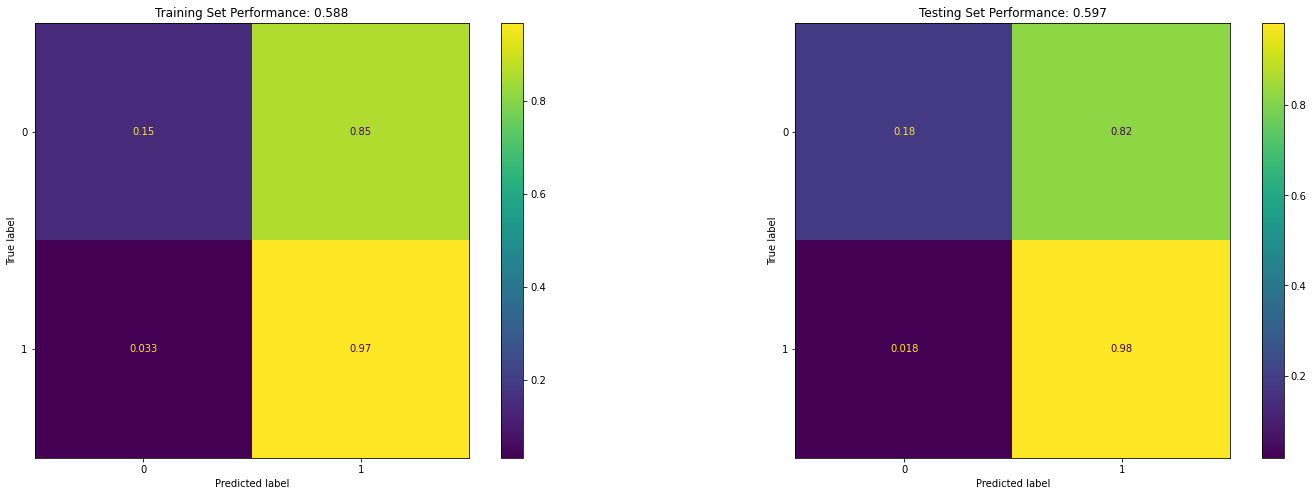

In [11]:
values_of_k = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k)
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

Performance is fairly consistent, but we see best performance for a k of 1, but in general larger K's work better here - until we get so big that class balance issues start to appear at which point performance falls of a cliff.

We can also try tweaking the distance weighting method, and we can see that using inverse distance weighting helps and even avoid the cliff dive as we make K too big.

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       154
           1       0.78      0.73      0.75       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       154
           1       0.78      0.73      0.75       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       154
           1       0.79      0.77      0.78       166

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

              preci

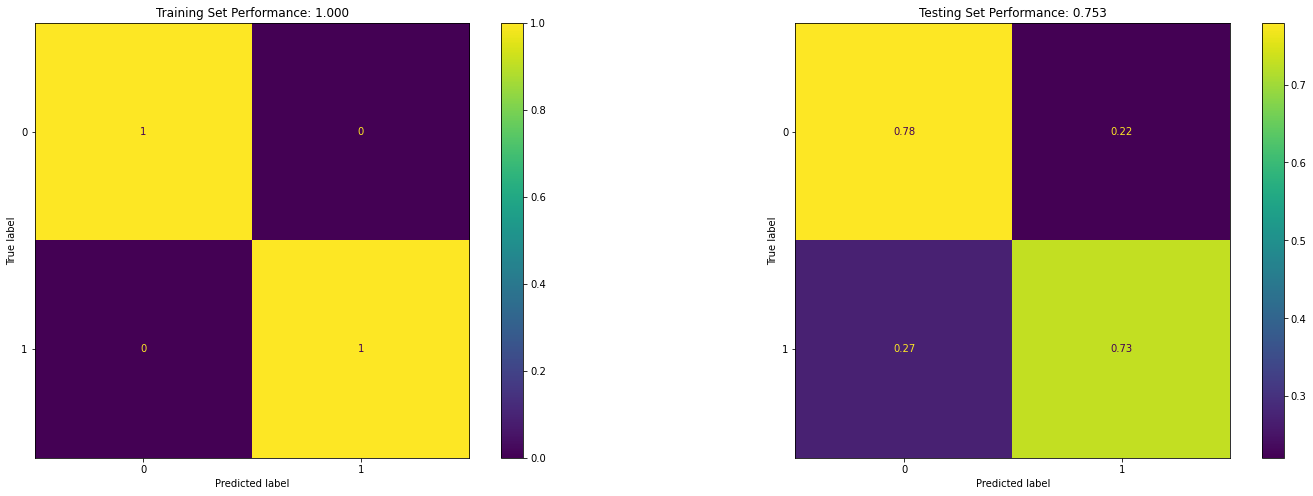

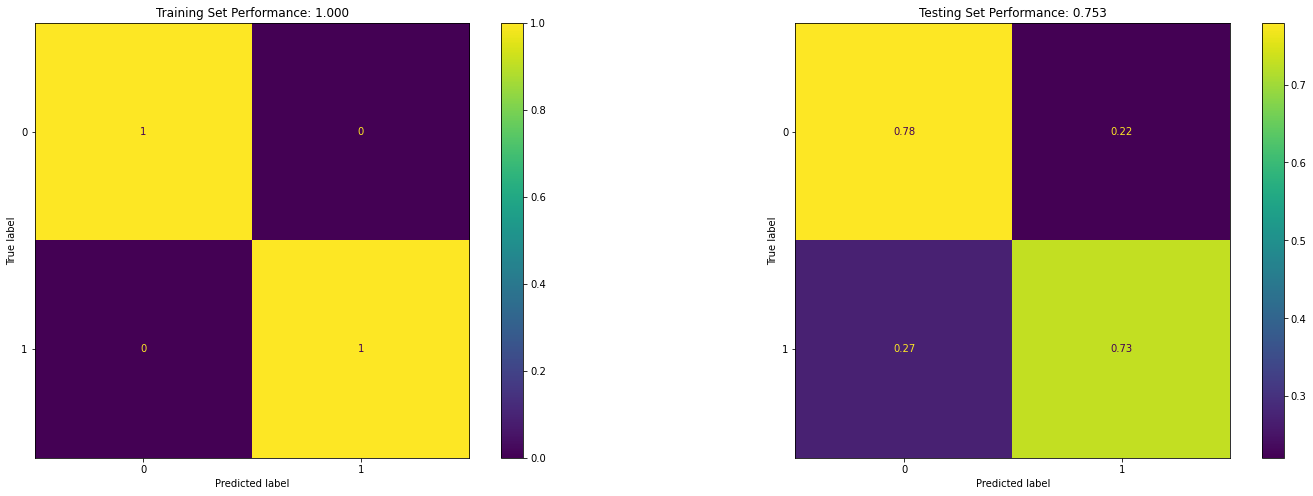

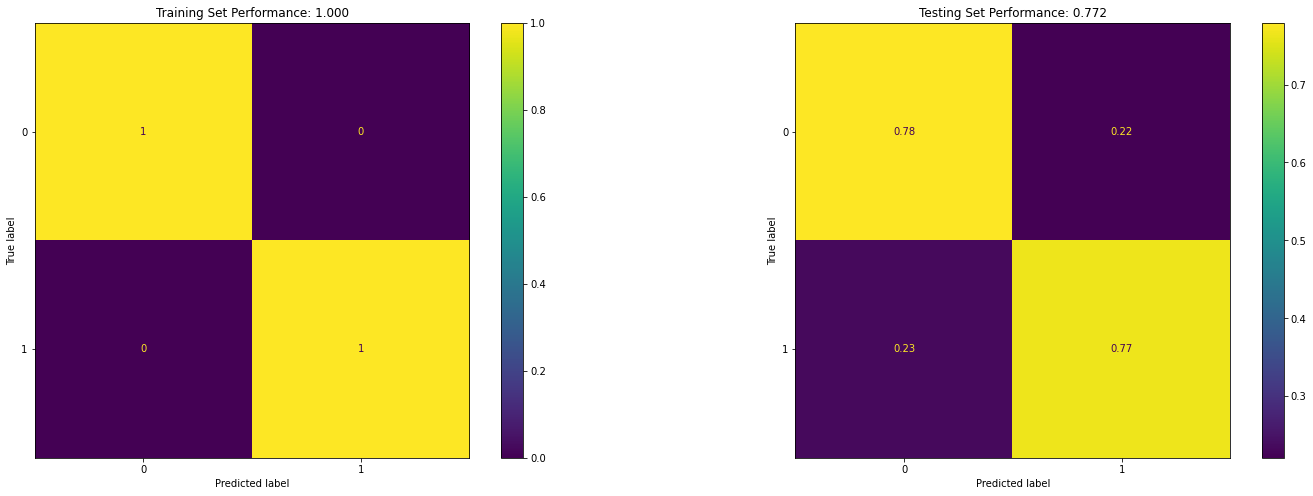

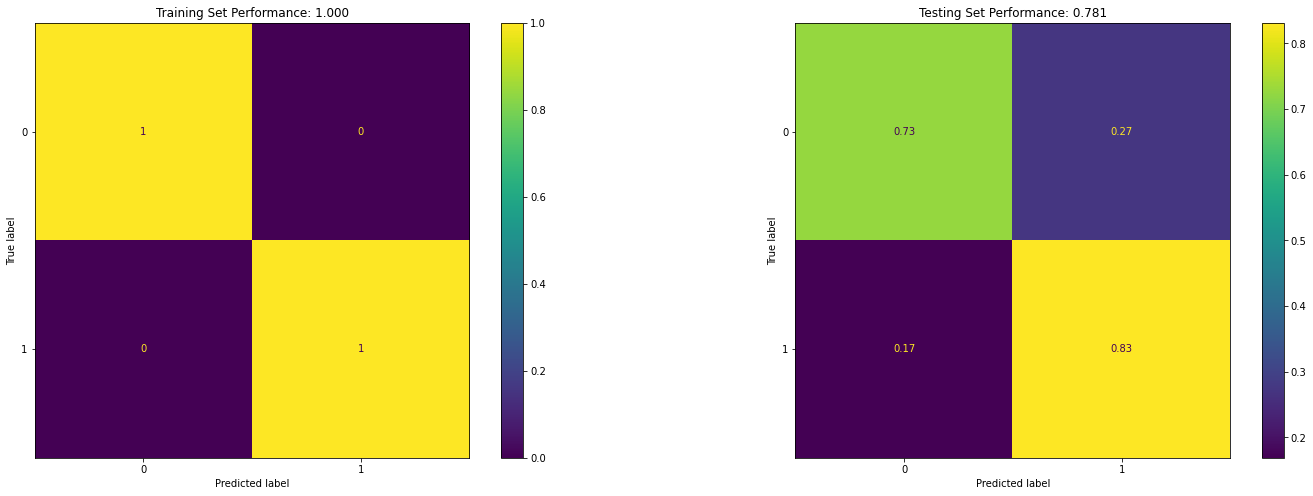

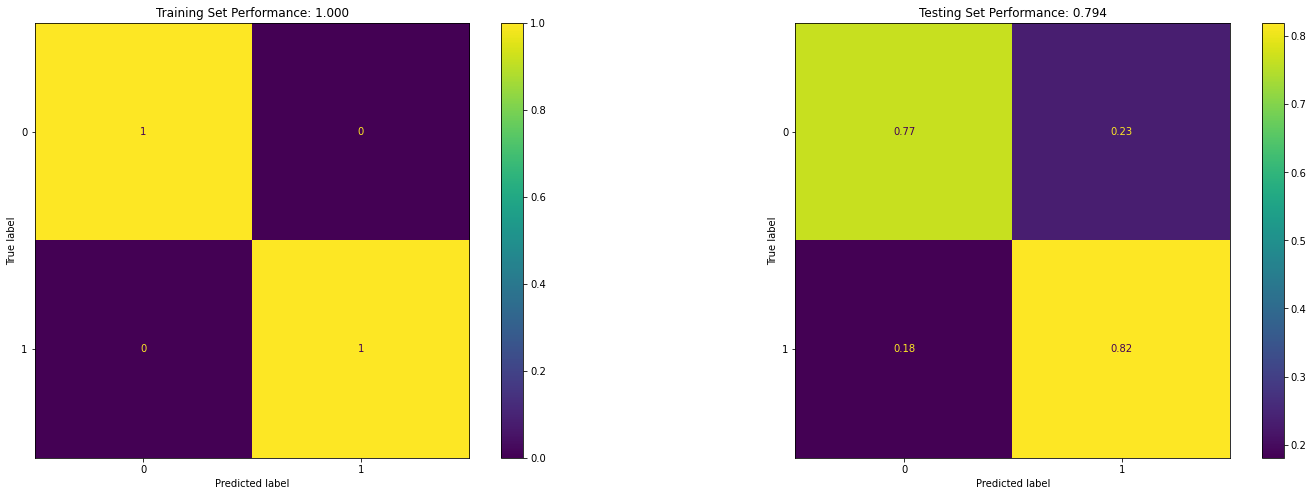

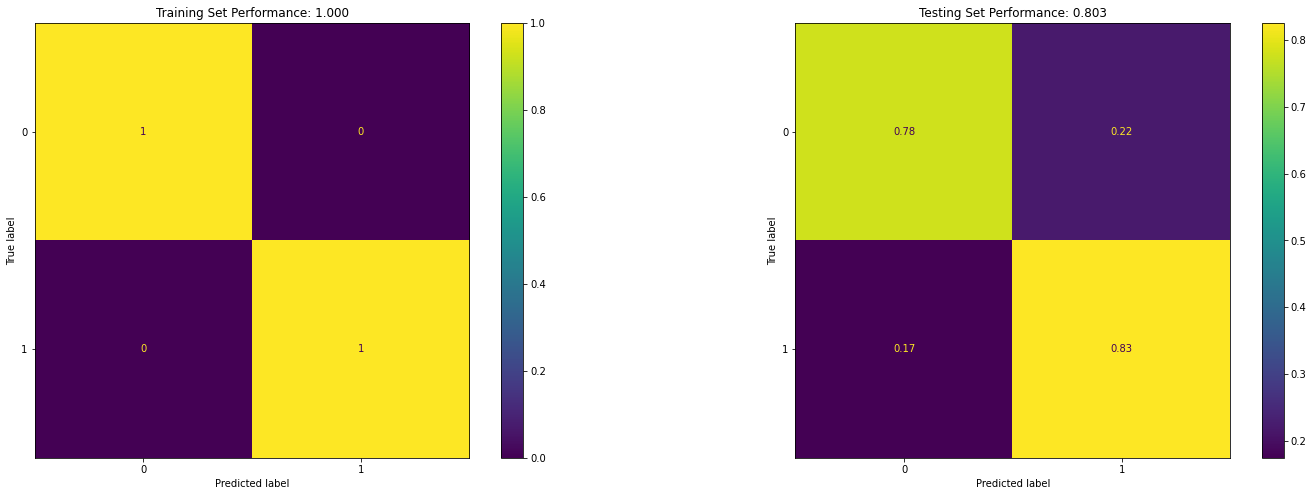

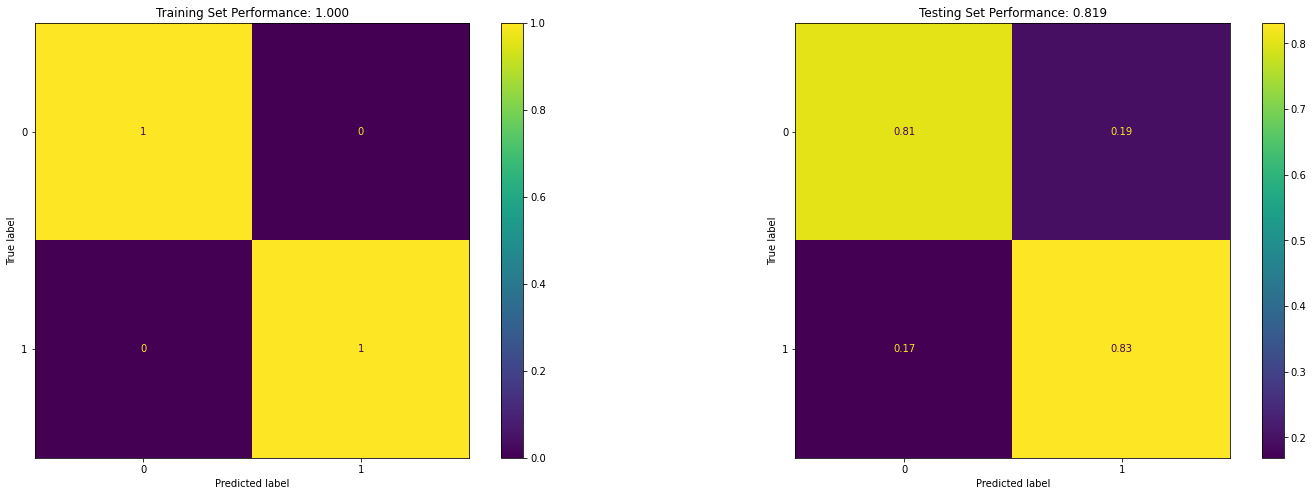

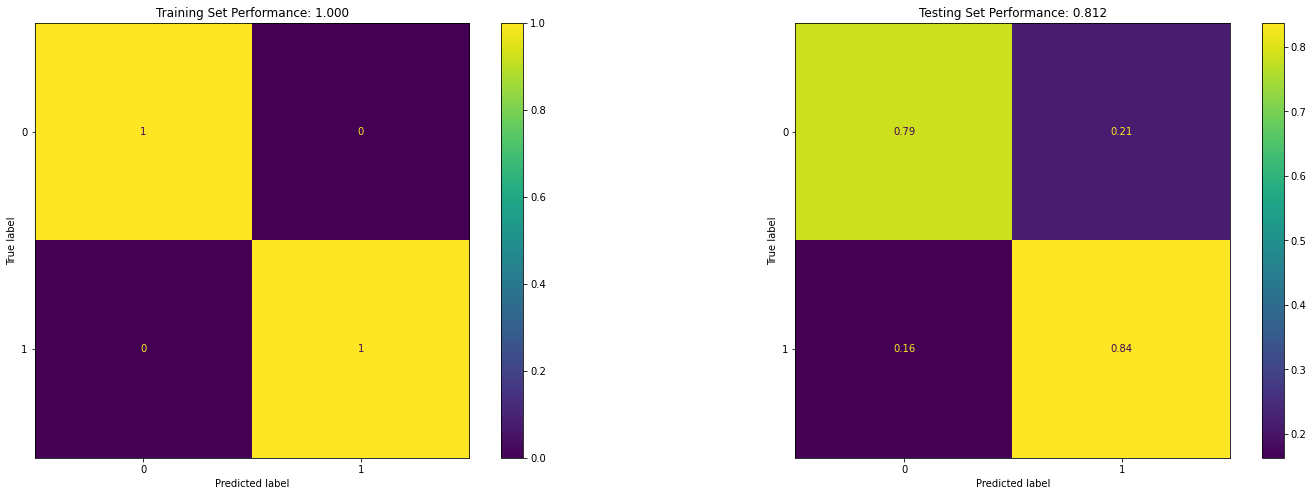

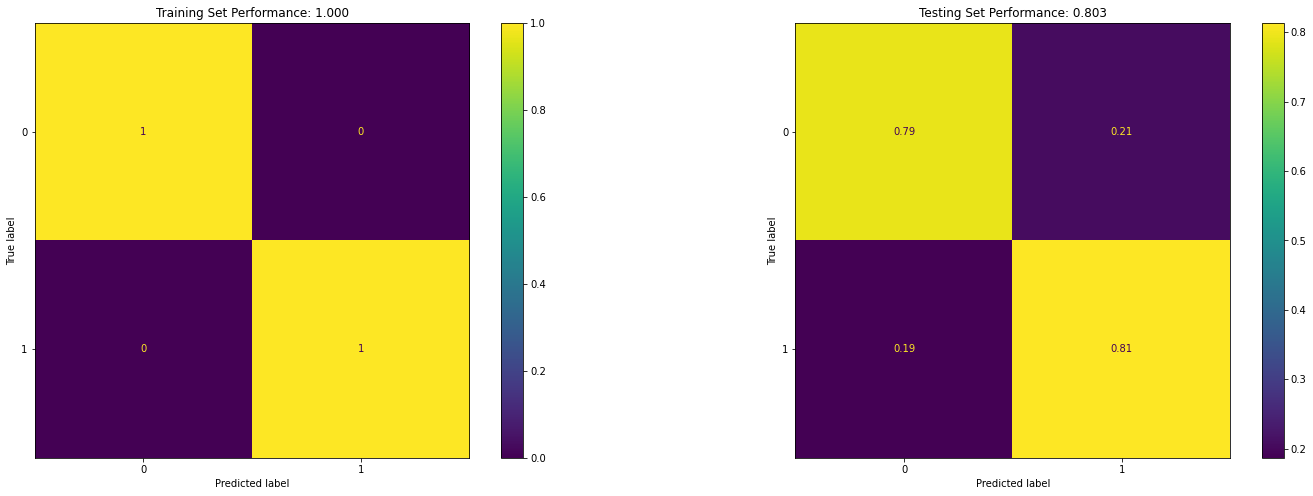

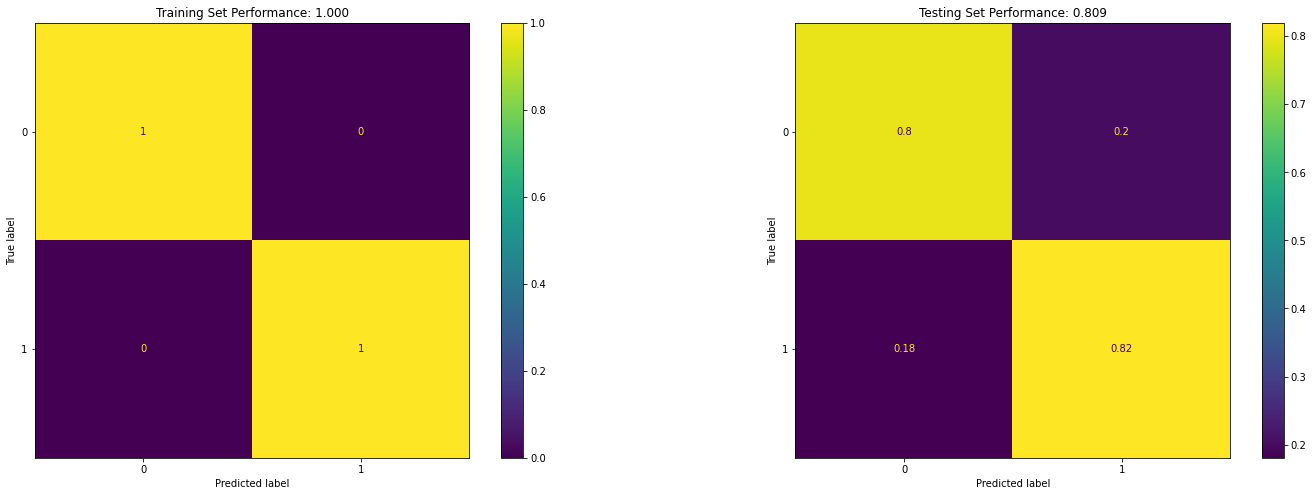

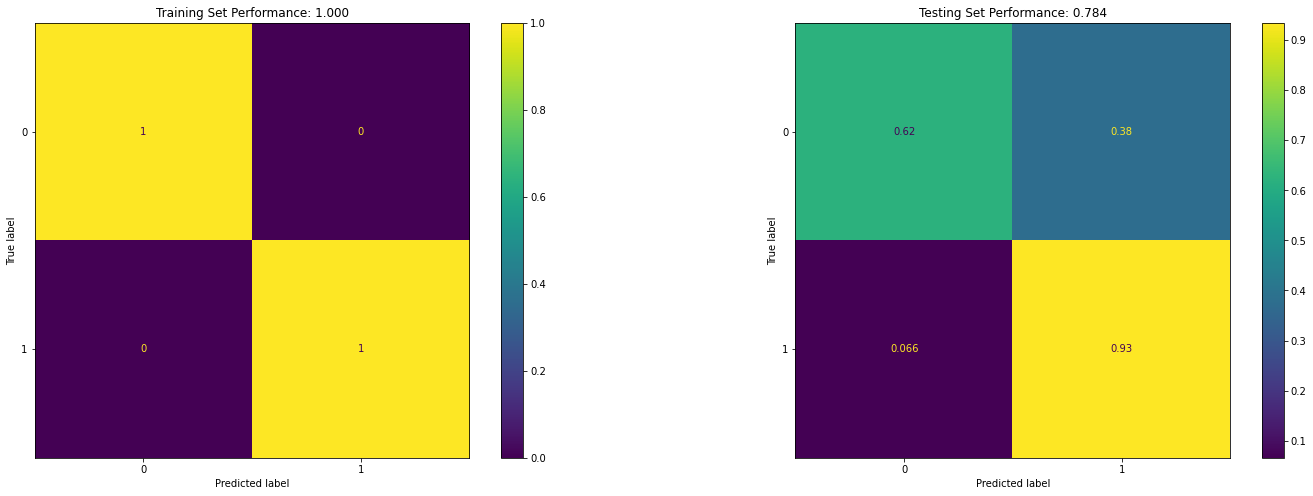

In [12]:
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

With regards to distance metrics, for our data the default of Euclidean is a fair choice here (note the default is actually Minkowski, though with p=2, which makes it equal to Euclidean), and we have no specific knowledge of the data that suggests otherwise. However, for the sake of science, we can play with it.

Based on previous observations, we'll set K=64, and use distance based weighting.

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       154
           1       0.83      0.84      0.84       166

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



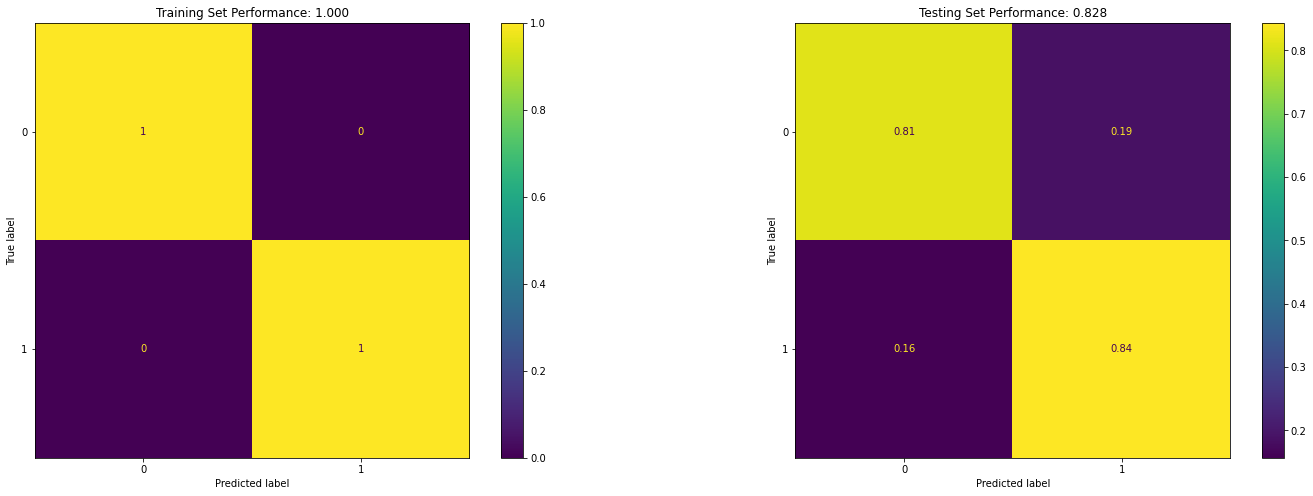

In [13]:
cknn = KNeighborsClassifier(n_neighbors=64, weights='distance', metric='manhattan')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       154
           1       0.79      0.84      0.81       166

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



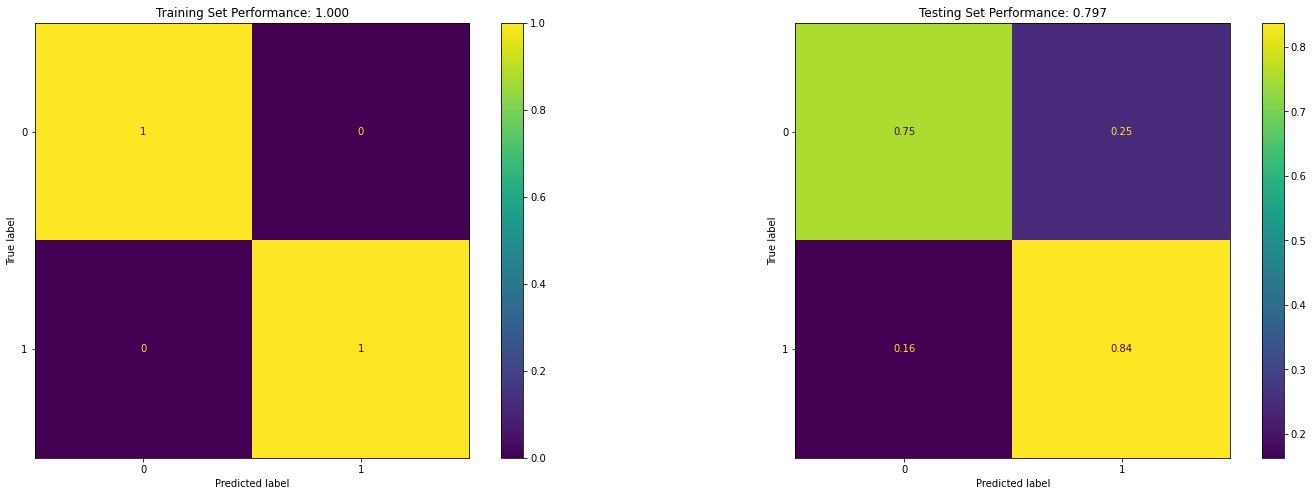

In [14]:
cknn = KNeighborsClassifier(n_neighbors=64, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(X_train.transpose())})
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

We can get to 82.8% with manhattan distance (L1). We'll leave the exploration of other metrics for your own time.

## Bonus: Random Forests

Because we can, we will.

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       154
           1       0.76      0.76      0.76       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



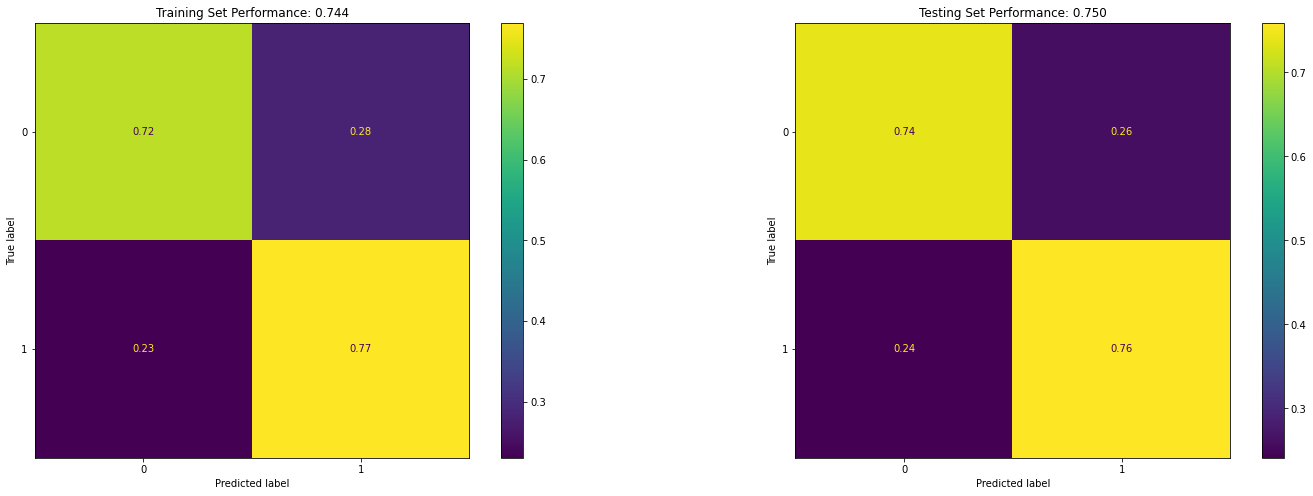

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

This works ok. Let's play with the tree depth and see how far we can go.

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       154
           1       0.74      0.81      0.78       166

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       154
           1       0.76      0.76      0.76       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       154
           1       0.78      0.74      0.76       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

              preci

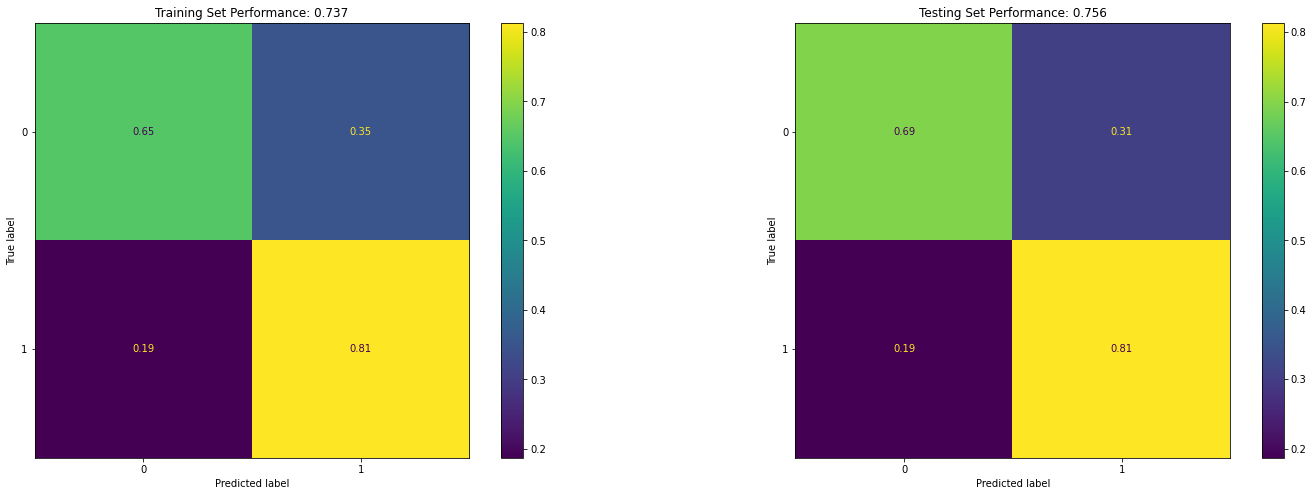

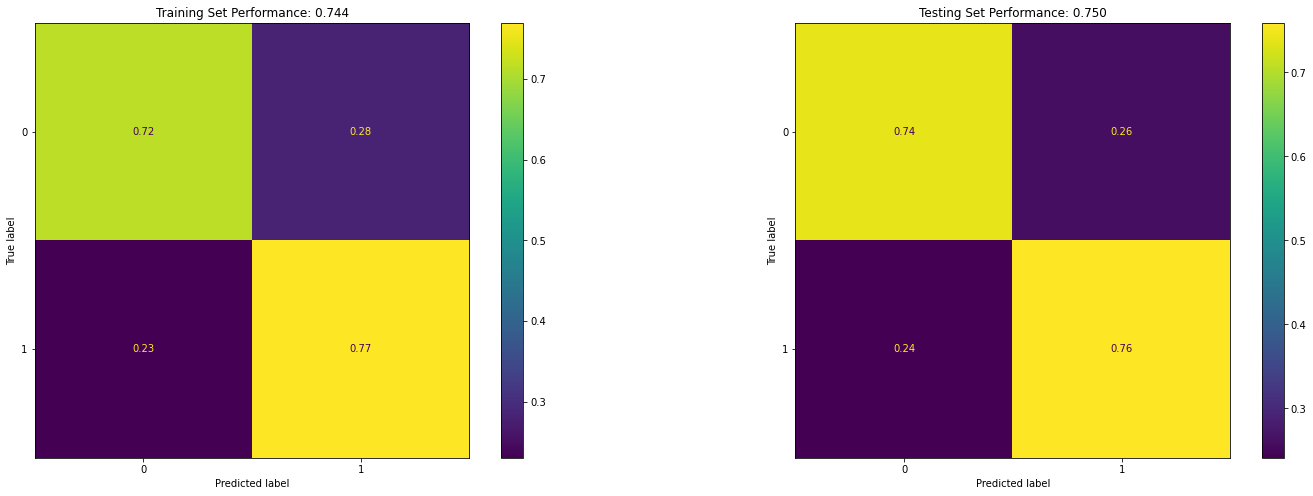

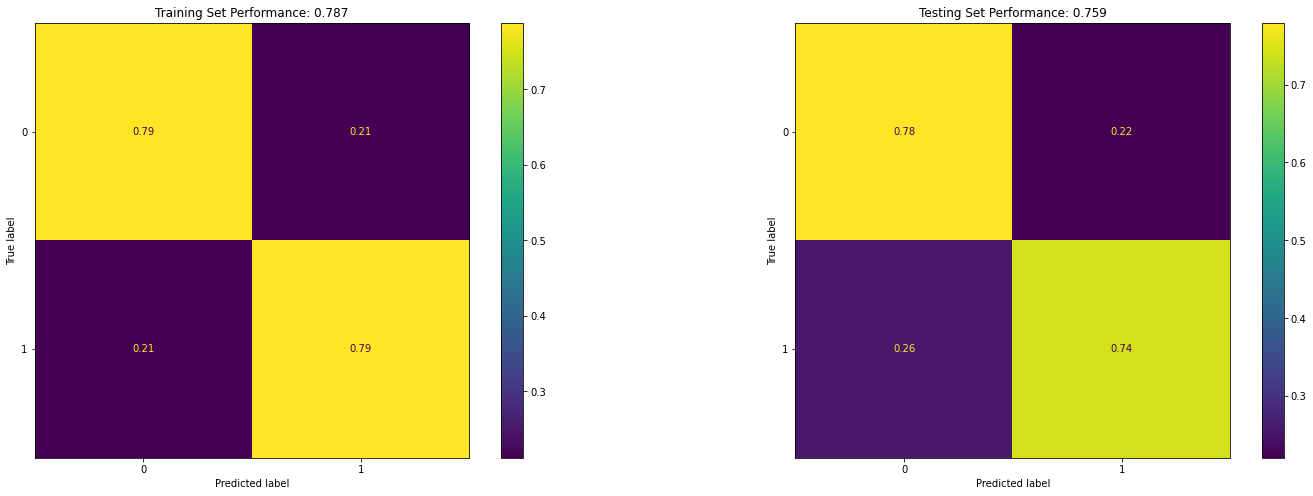

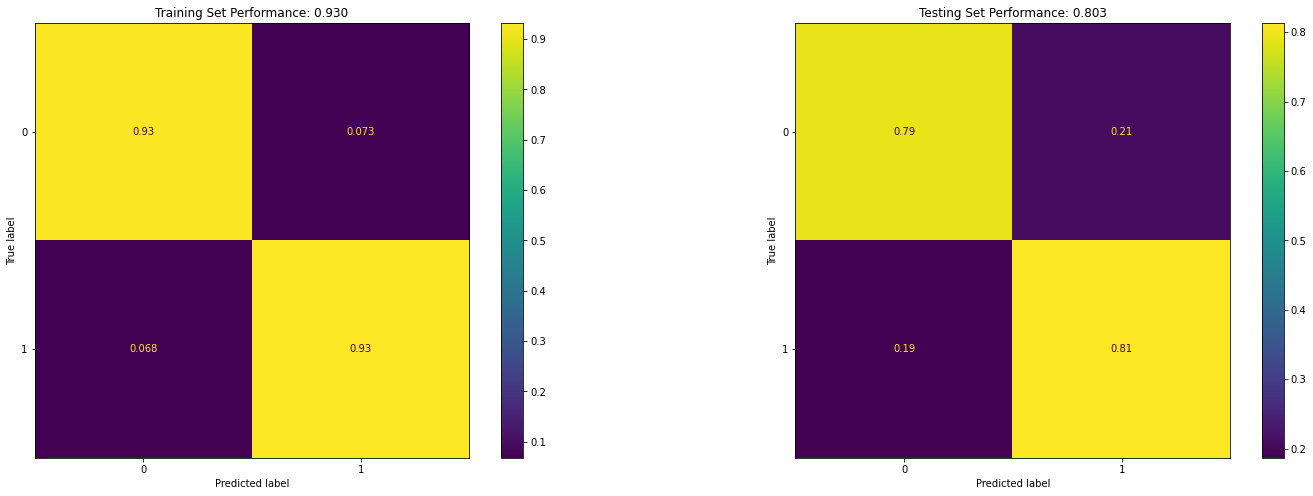

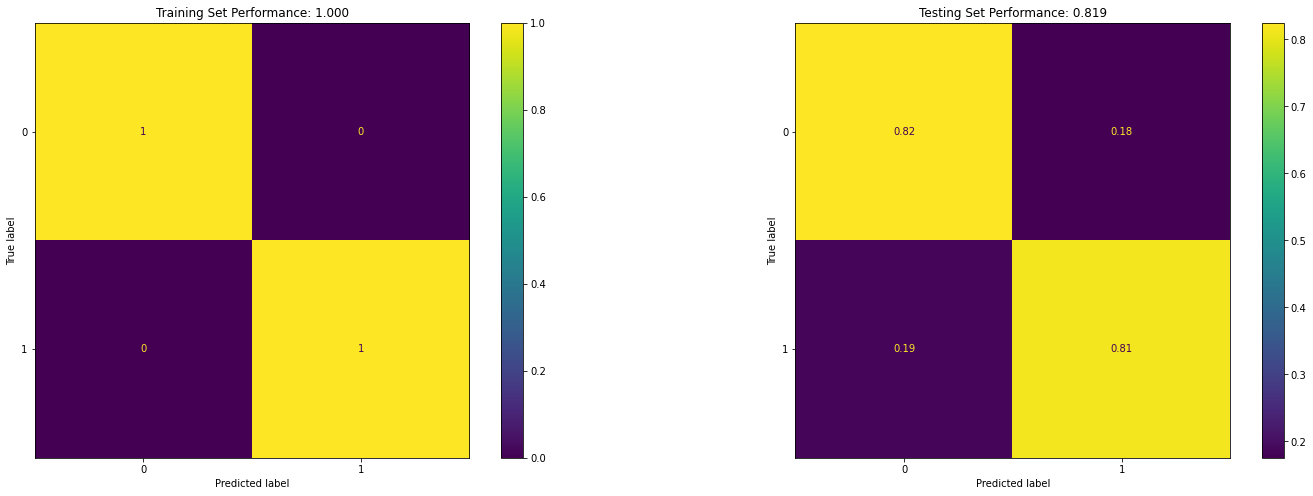

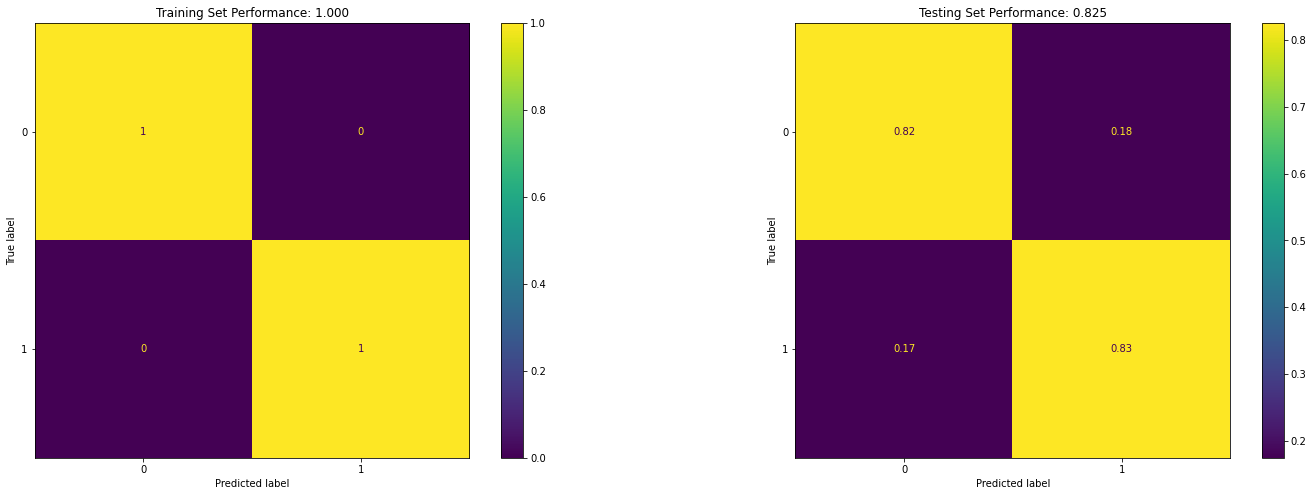

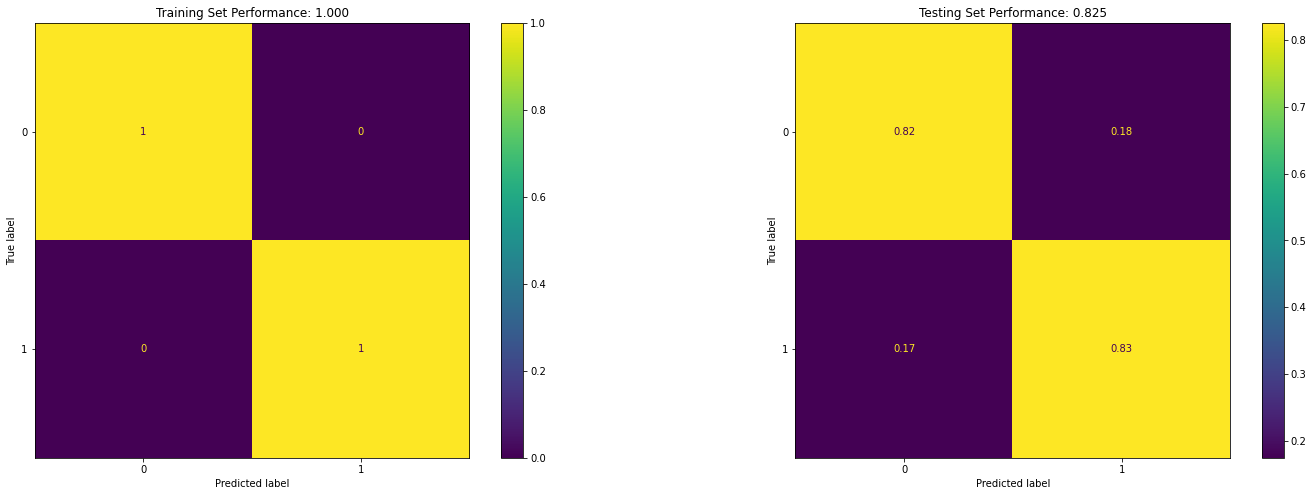

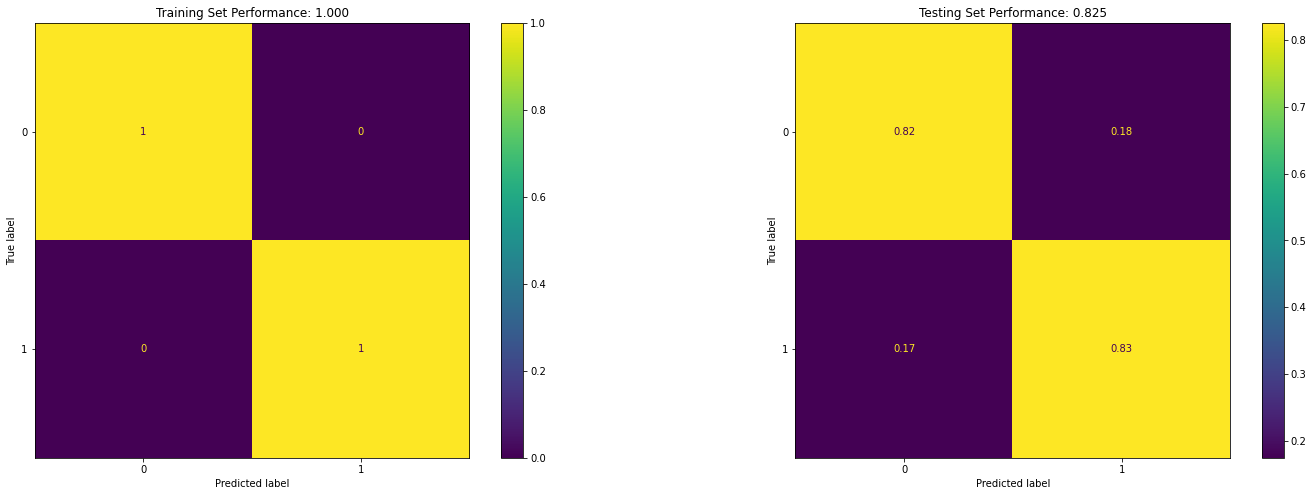

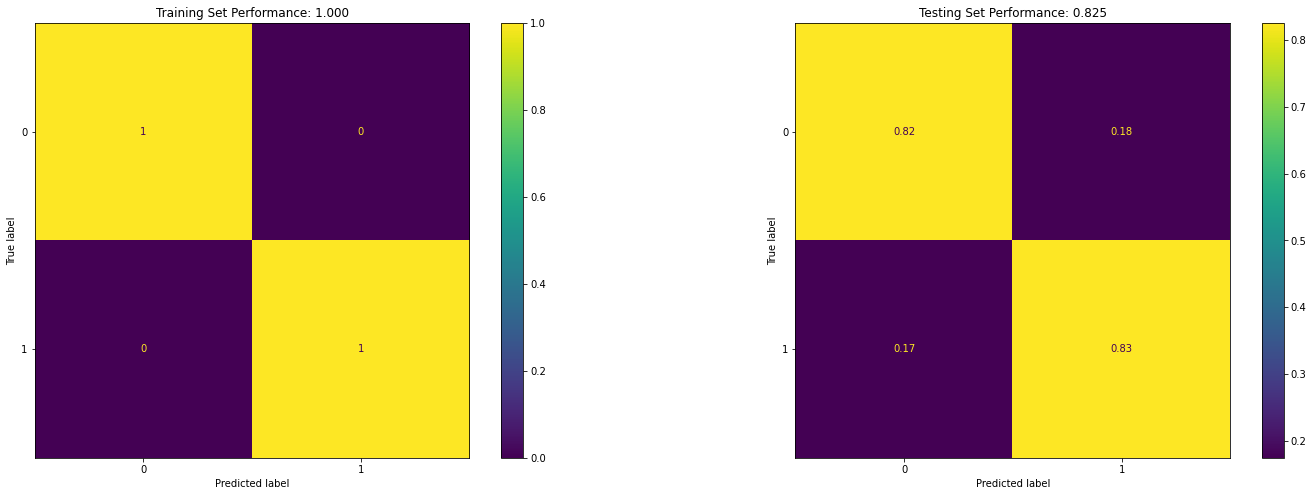

In [16]:
depth = [1, 2, 4, 8, 16, 32, 64, 128, 256]
for d in depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0).fit(X_train, Y_train)
    eval_model(rf, X_train, Y_train, X_test, Y_test)

We max out at 82.5%, and all of our very deep trees get that accuracy.

Given this, it's likely that a lot of our trees are actually getting no where near this depth, as we see performance stop changing at a depth of 32. This makes sense really, we only have 2 classes and about 10 dimensions, so there is likley very little need (if any) to go any deeper than 32, and in all likelihood out model never actually does (though it could if it wanted).

Further exploration of this, and other parameters, will be left to you.